In [2]:
#import libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

match_data = pd.read_csv('matches.csv', delimiter = ',')

df = pd.DataFrame(match_data)

In [3]:
#examine dataframe head

df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#examine dataframe tail
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [18]:
#examine dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [9]:
#check if there are any spelling variations among team names
print(df.winner.unique())
print(df.toss_winner.unique())

#replace spelling variations
df.winner.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)
df.toss_winner.replace('Rising Pune Supergiants', 'Rising Pune Supergiant', inplace=True)

#check that all spelling is now consistent
print(df.winner.unique())
print(df.toss_winner.unique())

['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan]
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants']
['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' nan]
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'G

In [10]:
#create two new columns in dataframe - "first_to_field" and 'first_to_bat
df['first_to_field'] = np.nan
df['first_to_bat'] = np.nan
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,first_to_field,first_to_bat
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,NaN,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,NaN,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,NaN,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,NaN,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,NaN,NaN


In [11]:
#fill in first_to_field and first_to_bat values based on coin toss decision
for ind, row in df.iterrows():
    if df.loc[ind, 'toss_decision'] == 'field':
        df.loc[ind, 'first_to_field'] = df.loc[ind, 'toss_winner']
    else:
        df.loc[ind, 'first_to_bat'] = df.loc[ind, 'toss_winner']

#fill in remaining blank first_to_field and first_to_bat values
for ind, row in df.iterrows():
    if pd.isnull(df.loc[ind, 'first_to_field']):
         if df.loc[ind, 'first_to_bat'] == df.loc[ind, 'team1']:
                df.loc[ind, 'first_to_field'] = df.loc[ind, 'team2']
         else:
            df.loc[ind, 'first_to_field'] = df.loc[ind, 'team1']
            
for ind, row in df.iterrows():
    if pd.isnull(df.loc[ind, 'first_to_bat']):
        if df.loc[ind, 'first_to_field'] == df.loc[ind, 'team1']:
            df.loc[ind, 'first_to_bat'] = df.loc[ind, 'team2']
        else:
            df.loc[ind, 'first_to_bat'] = df.loc[ind, 'team1']
    
df.head(10)



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,first_to_field,first_to_bat
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,Rising Pune Supergiant,Mumbai Indians
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,Kolkata Knight Riders,Gujarat Lions
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Kings XI Punjab,Rising Pune Supergiant
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,Delhi Daredevils,Royal Challengers Bangalore
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,Sunrisers Hyderabad,Gujarat Lions
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,Mumbai Indians,Kolkata Knight Riders
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,Kings XI Punjab,Royal Challengers Bangalore
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,Rising Pune Supergiant,Delhi Daredevils
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,Mumbai Indians,Sunrisers Hyderabad


In [14]:
#create new dataframe with relevant columns 

field_bat_df = df[['winner', 'first_to_field', 'first_to_bat']]
field_bat_df = field_bat_df.dropna(how='any', axis=0)

#calculate win percentage for fielding first and win percentage for batting first

first_to_field_wincounter = 0
first_to_bat_wincounter = 0

#count number of wins for fielding first, and for batting first
for ind, row in field_bat_df.iterrows():
    if field_bat_df.loc[ind, 'first_to_field'] == field_bat_df.loc[ind, 'winner']:
        first_to_field_wincounter = first_to_field_wincounter + 1
    else: 
        first_to_bat_wincounter = first_to_bat_wincounter + 1
        
#calculate win percentage
first_to_field_winpercentage = first_to_field_wincounter/len(field_bat_df)
first_to_bat_winpercentage = first_to_bat_wincounter/len(field_bat_df)

print(first_to_field_winpercentage, first_to_bat_winpercentage)

0.5434439178515008 0.4565560821484992


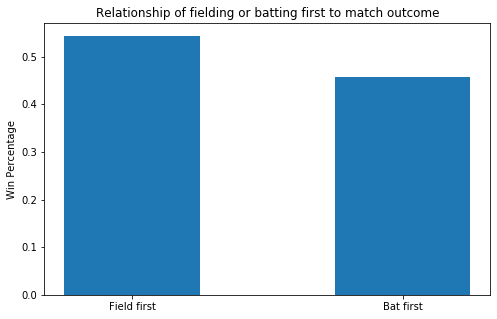

The team that fields first wins the match 54.34439178515008% of the time. Therefore it is better to field first.


In [23]:
#create bar graph to show win percentages of fielding and batting first

match_outcomes = ('Field first', 'Bat first')
field_bat_win_split = [first_to_field_winpercentage, first_to_bat_winpercentage]

plt.figure(figsize=(8,5))
plt.bar(match_outcomes, field_bat_win_split, width = 0.5)
plt.title('Relationship of fielding or batting first to match outcome')
plt.ylabel('Win Percentage')
plt.show()

if first_to_field_winpercentage > first_to_bat_winpercentage:
    which_is_better = 'field'
else:
    which_is_better = 'bat'
    
print('The team that fields first wins the match ' + str(first_to_field_winpercentage * 100) + '% of the time. Therefore it is better to ' + which_is_better + ' first.')


